### 逻辑回归

目标：建立分类器，求解出57个参数

设定阈值：根据阈值判断收入是否大于50k

#### 公式推导：

sigmoid函数：

$$g(z)=\frac{1}{1+e^ {-z}} $$

根据线性回归中的预测函数$h_\theta(x)$得到一个预测值

$$h_\theta(x)=\theta_0+\theta_1x_1+\theta_2x_2+...$$

$$h_\theta(x)=\sum_{i=0}^{m}{\theta_ix_i}=\theta^Tx$$

再将$h_\theta(x)$带入sigmoid函数里,就可以完成有预测值到概率的转换，即完成分类任务

新的预测函数$h_\theta(x)$为：

$$h_\theta(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$


这是一个二分类任务，所以概率可以表示为：

$$ p(y=1|x;\theta) = h_\theta(x)$$

$$p(y=0|x;\theta)=1-h_\theta(x)$$ 

上面两个式子整合在一起，可以得到

$$p(y|x;\theta)=(h_\theta(x))^y(1-h_\theta(x))^{1-y}$$

得到似然函数

$$L(\theta)=\prod_{i=1}^{m}{p(y_i|x;\theta)}=\prod_{i=1}^{m}{(h_\theta(x))^{y_i}(1-h_\theta(x))^{1-y_i}}$$

再对数似然得到：

$$l(\theta)=logL(\theta)=\sum_{i=1}^{m}{(y_ilogh_\theta(x_i)+(1-y_i)log(1-h_\theta(x_i)))}$$


根据极大似然估计，要求最大值，相当于梯度上升，但是要用梯度下降来解决问题，所以引入$J(\theta)$

$$J(\theta) = -\frac{1}{m}l(\theta)$$

引入正则化参数，使用L2正则化：

$$J(\theta) = -\frac{1}{m}l(\theta)+\frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_{j}^2}$$

即：

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}{(y_ilogh_\theta(x_i)+(1-y_i)log(1-h_\theta(x_i)))}+\frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_{j}^2}$$

然后在$J(\theta)$中对$\theta$求偏导，结果为：

未引入正则化参数时：

$$\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)x_i^j$$

引入正则化参数$\lambda$后：

$$\frac{\partial J(\theta)}{\partial\theta_j} = (\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)x_i^j)+\frac{\lambda}{m}\theta_j$$

$x_i^j$  :其中i表示第i个样本，j表示该样本的第j个特征


最后就可以进行参数更新了

未引入正则化参数时：

$$\theta_j=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)x_i^j$$

引入正则化参数$\lambda$后：

$$\theta_j=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}((h_\theta(x_i)-y_i)x_i^j+\frac{\lambda}{m}\theta_j)$$

式子中$\alpha$表示学习率或步长

$\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)x_i^j$表示更新的方向

步长* 方向=更新的值



### 要完成的模块

0.数据切分:分为测试集（3000）和验证集（1000）

1.sigmoid：映射到概率的函数

2.model：返回预测结果

3.cost：根据参数计算损失

4.gradient：计算每个参数的梯度方向

5.descent：进行参数更新

6.accuracy：计算精度

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [13]:
import os
path = 'income.csv'
data = pd.read_csv(path, header = None)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1,0.0,0.00,1.13,0.0,0.37,0.00,0.00,0.0,0.00,...,0.0,0.145,0.000,0.436,0.000,0.0,1.792,55,147,0
1,2,0.0,0.00,0.60,0.0,0.00,0.60,0.00,0.0,0.60,...,0.0,0.143,0.047,0.191,0.143,0.0,2.041,31,196,1
2,3,0.0,0.00,0.48,0.0,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.000,0.450,0.000,0.0,1.138,4,41,0
3,4,0.0,0.51,0.00,0.0,0.51,0.51,1.02,0.0,0.00,...,0.0,0.142,0.000,0.071,1.212,0.0,7.025,130,281,1
4,5,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.64,...,0.0,0.116,0.000,0.232,0.000,0.0,1.551,6,45,0


In [14]:
data.shape

(4000, 59)

因为这个数据中ID没啥用，所以为了方便处理，将ID那一列置为1，作为第一个特征，方便确定$\theta_0$

In [15]:
data[[0]] = data[[0]] / data[[0]]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,0.0,0.00,1.13,0.0,0.37,0.00,0.00,0.0,0.00,...,0.0,0.145,0.000,0.436,0.000,0.0,1.792,55,147,0
1,1.0,0.0,0.00,0.60,0.0,0.00,0.60,0.00,0.0,0.60,...,0.0,0.143,0.047,0.191,0.143,0.0,2.041,31,196,1
2,1.0,0.0,0.00,0.48,0.0,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.000,0.450,0.000,0.0,1.138,4,41,0
3,1.0,0.0,0.51,0.00,0.0,0.51,0.51,1.02,0.0,0.00,...,0.0,0.142,0.000,0.071,1.212,0.0,7.025,130,281,1
4,1.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.64,...,0.0,0.116,0.000,0.232,0.000,0.0,1.551,6,45,0


Text(0, 0.5, 'Frequency')

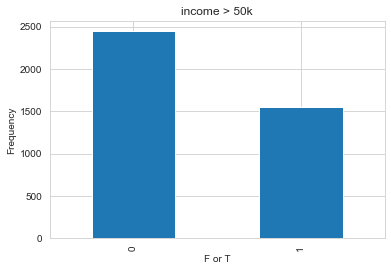

In [16]:
count_classes = pd.value_counts(data[58], sort = True).sort_index()
count_classes.plot(kind = 'bar')# kind = 'bar',表示画条形图
plt.title("income > 50k")
plt.xlabel("F or T")
plt.ylabel("Frequency")

可以发现样本中收入大于60k和小于的差距不是特别悬殊，故暂时不对样本进行均衡处理

均衡处理方案：下采样（同样少）、过采样（同样多）

#### 0.数据切分

利用sklearn中的train_test_split函数

In [17]:
Data = data.values 
cols = Data.shape[1]
X = Data[:,0:cols-1] # 特征
y = Data[:,cols-1:cols]  # class

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  3000
Number transactions test dataset:  1000
Total number of transactions:  4000


In [18]:
X_train[:5]

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 5.880e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.470e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.200e+00, 0.000e+00, 7.300e-01, 0.000e+

In [19]:
y_train[:5]

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.]])

将参数$\theta$初始化

In [20]:
theta = np.zeros([1,58])
theta.shape

(1, 58)

#### 1.sigmoid函数实现

$$g(z)=\frac{1}{1+e^ {-z}} $$

In [21]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

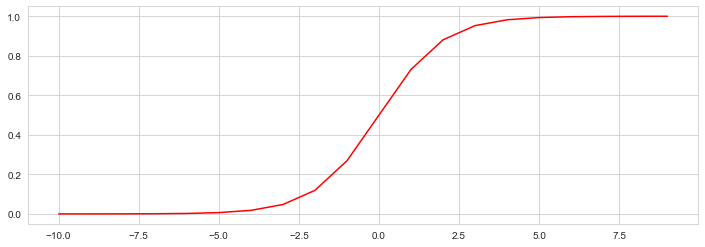

In [22]:
sns.set_style("whitegrid")
nums = np.arange(-10, 10, step = 1)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(nums, sigmoid(nums), 'r')

#### 2.model(预测函数)实现

$$ h_\theta(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$

In [23]:
def model(X, theta):
    return sigmoid(np.dot(X,theta.T))

#### 3.损失函数

将对数似然函数去掉负号

$$Cost(h_\theta(x),y) = -y\log(h_\theta(x))-(1-y)\log(1-h_\theta(x))$$

另外引入正则化参数后，损失函数变为，使用L2正则化：

求平均损失：

$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}{Cost(h_\theta(x_i),y_i)}$$

另外引入正则化参数后，损失函数变为，使用L2正则化：

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}{(y_ilogh_\theta(x_i)+(1-y_i)log(1-h_\theta(x_i)))}+\frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_{j}^2}$$



$$model(X,theta) = h_\theta(x)$$

In [24]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)+0.000000001))
    right = np.multiply(1-y, np.log(1-model(X, theta)+0.000000001))
    return (np.sum(left - right) / len(X))

In [25]:
cost(X_train,y_train,theta)

0.6931471785599455

#### 4.计算梯度

$$\frac{\partial J}{\partial\theta_j} = -\frac{1}{m}\sum_{i=1}^{m}(y_i-
h_\theta(x_i))x_i^j$$

引入正则化后：

$$\frac{\partial J(\theta)}{\partial\theta_j} = (\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)x_i^j)+\frac{\lambda}{m}\theta_j$$

In [26]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
        
    return grad

#### 几种停止策略

In [27]:
STOP_ITER = 0 # 以迭代次数为准
STOP_COST = 1 # 以损失值为准
STOP_GRAD = 2 # 以梯度为准
# 上面是三种梯度下降停止策略
def stopCriterion(type, value, threshold):
    if type == STOP_ITER:
        return value > threshold
    elif type == STOP_COST:
        return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:
        return np.linalg.norm(value) < threshold

#### 梯度下降求解

In [28]:
import time
# 梯度下降求解
def descent(X, y, theta, batchSize, stopType, thresh, alpha):
    init_time = time.time()
    i = 0  # 迭代次数
    k = 0  # batch
    # X, y = shuffleData(data)
    grad = np.zeros(theta.shape)  # 计算的梯度
    costs = [cost(X, y, theta)]  # 损失值
    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize  # 取batch数量个数据
        if k >= n:
            k = 0
            # X, y = shuffleData(data)  # 重新洗牌
        theta = theta - alpha*grad  # 参数更新
        costs.append(cost(X, y, theta))  # 计算新的损失
        i += 1
        
        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        if stopCriterion(stopType, value, thresh):
            break
        
    return theta, i-1, costs, grad, time.time() - init_time

In [29]:
def runExpe(X, y, theta, batchSize, stopType, thresh, alpha):
    theta, iter, costs, grad, dur = descent(X, y, theta, batchSize, stopType, thresh, alpha)  
    print("theta:{}".format(theta))
    print("duration:{:03.2f}s".format(dur))
    fig, ax = plt.subplots(figsize=(12,4))
    # print(costs)
    # print(len(costs))
    # print(type(costs))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    #ax.set_title(name.upper() + ' - Error vs. Iteration')
    ax.set_title('loss')
    return theta

### 不同停止策略对结果的影响

#### 1.设定迭代次数

#### 2.设定阈值

直到损失函数减小的值小于thresh时，停止迭代

#### 3.根据梯度变化

设定阈值thresh，当梯度变化小于这个值的时候停止迭代

### 对比不同的梯度下降方法

#### 1.随机梯度下降

#### 2.Mini-batch

In [30]:
n = 3000

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


theta:[[-1.1875267  -0.05127322 -0.47364156 -0.14221558  0.04034296 -0.0148043
   0.02768807  0.11014966  0.05429383  0.0492578  -0.06272375  0.01519528
  -0.68668975 -0.02756297 -0.03183571  0.04694768  0.16305574  0.07792847
  -0.01189918 -0.88832029  0.12550831 -0.06348344  0.153882    0.14169783
   0.12284113 -1.44894026 -0.7329898  -0.92355607 -0.34717649 -0.25585104
  -0.26258639 -0.17672846 -0.10607129 -0.30193131 -0.10424317 -0.32351625
  -0.20409517 -0.34425865 -0.02162298 -0.23704423 -0.11076514 -0.16046604
  -0.39925214 -0.11871195 -0.19243118 -0.62451224 -0.55038813 -0.00890981
  -0.09346236 -0.06907859 -0.22154556 -0.03491131  0.07917127  0.08057946
   0.02050078 -1.84046134  2.71333048 -0.21080113]]
duration:0.35s


array([[-1.1875267 , -0.05127322, -0.47364156, -0.14221558,  0.04034296,
        -0.0148043 ,  0.02768807,  0.11014966,  0.05429383,  0.0492578 ,
        -0.06272375,  0.01519528, -0.68668975, -0.02756297, -0.03183571,
         0.04694768,  0.16305574,  0.07792847, -0.01189918, -0.88832029,
         0.12550831, -0.06348344,  0.153882  ,  0.14169783,  0.12284113,
        -1.44894026, -0.7329898 , -0.92355607, -0.34717649, -0.25585104,
        -0.26258639, -0.17672846, -0.10607129, -0.30193131, -0.10424317,
        -0.32351625, -0.20409517, -0.34425865, -0.02162298, -0.23704423,
        -0.11076514, -0.16046604, -0.39925214, -0.11871195, -0.19243118,
        -0.62451224, -0.55038813, -0.00890981, -0.09346236, -0.06907859,
        -0.22154556, -0.03491131,  0.07917127,  0.08057946,  0.02050078,
        -1.84046134,  2.71333048, -0.21080113]])

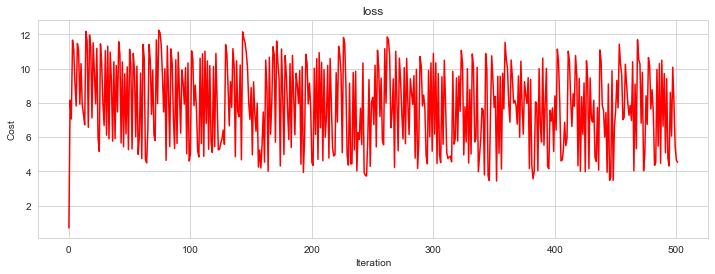

In [31]:
runExpe(X_train, y_train, theta, 32, STOP_ITER, thresh=500, alpha=0.01)

theta:[[-8.22248225e-04 -1.86265948e-06 -3.07294722e-04 -3.63738548e-05
   1.14390835e-04  1.13647338e-04  6.10551029e-05  2.00006935e-04
   9.63911585e-05  5.12037682e-05 -1.93104842e-06  3.97099555e-05
  -4.44944769e-04  4.59272428e-06 -1.28651992e-05  5.06743042e-05
   3.12782302e-04  1.46836496e-04  8.08185711e-05 -2.30321848e-04
   1.46920329e-04  3.15043984e-04  1.34174371e-04  1.72763307e-04
   1.48013713e-04 -1.34039577e-03 -6.33429065e-04 -2.12156912e-03
  -2.72131034e-04 -2.26696446e-04 -2.28167738e-04 -1.51753749e-04
  -9.78602790e-05 -2.37478173e-04 -9.68516609e-05 -2.44346420e-04
  -1.78747779e-04 -2.81376363e-04 -2.26779427e-05 -2.00417950e-04
  -8.53615482e-05 -1.17396275e-04 -3.52790998e-04 -1.07352046e-04
  -1.86833408e-04 -5.58562483e-04 -4.41336100e-04 -9.57122426e-06
  -7.44151537e-05 -5.50352735e-05 -1.70988242e-04 -2.82068352e-05
   1.97175496e-04  1.06841880e-04  2.98288733e-05 -7.52974039e-04
   7.05346840e-03 -1.09360881e-04]]
duration:33.86s


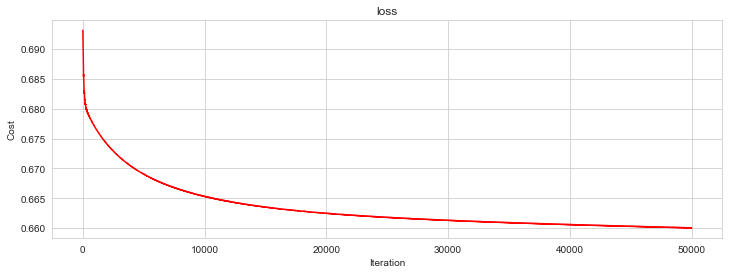

In [32]:
theta0 = runExpe(X_train, y_train, theta, 32, STOP_ITER, thresh=50000, alpha=0.0000001)

In [33]:
theta0

array([[-8.22248225e-04, -1.86265948e-06, -3.07294722e-04,
        -3.63738548e-05,  1.14390835e-04,  1.13647338e-04,
         6.10551029e-05,  2.00006935e-04,  9.63911585e-05,
         5.12037682e-05, -1.93104842e-06,  3.97099555e-05,
        -4.44944769e-04,  4.59272428e-06, -1.28651992e-05,
         5.06743042e-05,  3.12782302e-04,  1.46836496e-04,
         8.08185711e-05, -2.30321848e-04,  1.46920329e-04,
         3.15043984e-04,  1.34174371e-04,  1.72763307e-04,
         1.48013713e-04, -1.34039577e-03, -6.33429065e-04,
        -2.12156912e-03, -2.72131034e-04, -2.26696446e-04,
        -2.28167738e-04, -1.51753749e-04, -9.78602790e-05,
        -2.37478173e-04, -9.68516609e-05, -2.44346420e-04,
        -1.78747779e-04, -2.81376363e-04, -2.26779427e-05,
        -2.00417950e-04, -8.53615482e-05, -1.17396275e-04,
        -3.52790998e-04, -1.07352046e-04, -1.86833408e-04,
        -5.58562483e-04, -4.41336100e-04, -9.57122426e-06,
        -7.44151537e-05, -5.50352735e-05, -1.70988242e-0

### 精度预测

In [402]:
def predict(X, theta):
    # 阈值设定为0.5，概率大于0.5预测值为1，小于0.5则为0
    return [1 if x>= 0.5 else 0 for x in model(X, theta)]

In [464]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = predict(X_test, theta0)

accuracy_score(y_test, y_pred)
# classification_report(y_test, y_pred)

0.436

### 实验优化

### 用数据预处理之后再次进行实验

#### 数据预处理

利用sklearn的一个函数preprocessing对数据进行预处理，使得生成的数据都在一定范围内波动，可以与没有进行预处理的数据最终的结果进行对比

In [410]:
from sklearn import preprocessing as pp

dealed_data = data.copy()
print(type(dealed_data))
dealed_data = pp.scale(data, axis=0)
print(type(dealed_data))
dealed_data[:5]

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


array([[ 0.00e+00, -3.46e-01, -1.66e-01,  1.68e+00, -4.53e-02,  8.56e-02,
        -3.57e-01, -2.82e-01, -2.59e-01, -3.34e-01, -3.64e-01, -2.92e-01,
        -6.23e-01, -3.11e-01, -1.75e-01, -1.90e-01,  1.82e-01, -3.25e-01,
         3.54e-01, -2.90e-01, -1.67e-01, -3.61e-01, -1.17e-01, -2.87e-01,
        -2.07e-01, -3.26e-01, -3.01e-01, -2.32e-01, -2.27e-01, -1.57e-01,
        -2.24e-01, -1.55e-01, -1.43e-01, -1.72e-01, -1.45e-01, -1.89e-01,
        -2.47e-01, -3.23e-01, -6.25e-02, -1.80e-01, -1.94e-01, -1.24e-01,
        -1.74e-01, -2.06e-01, -1.27e-01, -3.04e-01, -2.01e-01, -6.93e-02,
        -1.19e-01, -1.60e-01,  3.37e-02, -1.76e-01,  2.01e-01, -3.02e-01,
        -1.03e-01, -1.04e-01,  1.35e-02, -2.38e-01, -7.97e-01],
       [ 0.00e+00, -3.46e-01, -1.66e-01,  6.36e-01, -4.53e-02, -4.57e-01,
         1.94e+00, -2.82e-01, -2.59e-01,  1.91e+00, -3.64e-01, -2.92e-01,
         1.53e+00, -3.11e-01, -1.75e-01, -1.90e-01,  8.54e-02, -3.25e-01,
        -3.42e-01,  6.13e-01, -1.67e-01,  3.40e-

标准化后数据格式变成了ndarray，不方便观察标准化后结果，给变回来变成dataframe

In [411]:
dealed_data = pd.DataFrame(dealed_data)
dealed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.0,-0.345874,-0.165937,1.682807,-0.045272,0.085624,-0.356976,-0.282492,-0.25936,-0.334026,...,-0.159701,0.033670,-0.176108,0.201020,-0.302462,-0.102646,-0.103960,0.013458,-0.238062,-0.797072
1,0.0,-0.345874,-0.165937,0.636491,-0.045272,-0.456581,1.942201,-0.282492,-0.25936,1.914865,...,-0.159701,0.026219,0.327348,-0.090481,0.268144,-0.102646,-0.096448,-0.104431,-0.150551,1.254593
2,0.0,-0.345874,-0.165937,0.399589,-0.045272,-0.456581,-0.356976,-0.282492,-0.25936,-0.334026,...,-0.159701,-0.506573,-0.176108,0.217677,-0.302462,-0.102646,-0.123691,-0.237055,-0.427374,-0.797072
3,0.0,-0.345874,0.204054,-0.548018,-0.045272,0.290783,1.597325,2.360100,-0.25936,-0.334026,...,-0.159701,0.022493,-0.176108,-0.233257,4.533722,-0.102646,0.053915,0.381859,0.001256,1.254593
4,0.0,-0.345874,-0.165937,-0.548018,-0.045272,-0.456581,-0.356976,-0.282492,-0.25936,2.064791,...,-0.159701,-0.074378,-0.176108,-0.041699,-0.302462,-0.102646,-0.111231,-0.227231,-0.420230,-0.797072


因为前面用sklearn的一个函数对数据进行标准化的时候把class的值也改变了，所以这里给改回来

In [412]:
dealed_data[58][dealed_data[58]<0]=0
dealed_data[58][dealed_data[58]>0]=1
dealed_data[0] = 1
dealed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1,-0.345874,-0.165937,1.682807,-0.045272,0.085624,-0.356976,-0.282492,-0.25936,-0.334026,...,-0.159701,0.033670,-0.176108,0.201020,-0.302462,-0.102646,-0.103960,0.013458,-0.238062,0.0
1,1,-0.345874,-0.165937,0.636491,-0.045272,-0.456581,1.942201,-0.282492,-0.25936,1.914865,...,-0.159701,0.026219,0.327348,-0.090481,0.268144,-0.102646,-0.096448,-0.104431,-0.150551,1.0
2,1,-0.345874,-0.165937,0.399589,-0.045272,-0.456581,-0.356976,-0.282492,-0.25936,-0.334026,...,-0.159701,-0.506573,-0.176108,0.217677,-0.302462,-0.102646,-0.123691,-0.237055,-0.427374,0.0
3,1,-0.345874,0.204054,-0.548018,-0.045272,0.290783,1.597325,2.360100,-0.25936,-0.334026,...,-0.159701,0.022493,-0.176108,-0.233257,4.533722,-0.102646,0.053915,0.381859,0.001256,1.0
4,1,-0.345874,-0.165937,-0.548018,-0.045272,-0.456581,-0.356976,-0.282492,-0.25936,2.064791,...,-0.159701,-0.074378,-0.176108,-0.041699,-0.302462,-0.102646,-0.111231,-0.227231,-0.420230,0.0


In [413]:
# 预处理过的数据

dealed_Data = dealed_data.values 
cols2 = dealed_Data.shape[1]
dealed_X = dealed_Data[:,0:cols2-1]
dealed_y = dealed_Data[:,cols2-1:cols2]

from sklearn.model_selection import train_test_split

dealed_X_train, dealed_X_test, dealed_y_train, dealed_y_test = train_test_split(dealed_X, dealed_y, test_size = 0.25, random_state = 0)

print("Number transactions train dataset: ", len(dealed_X_train))
print("Number transactions test dataset: ", len(dealed_X_test))
print("Total number of transactions: ", len(dealed_X_train)+len(dealed_X_test))

Number transactions train dataset:  3000
Number transactions test dataset:  1000
Total number of transactions:  4000


In [414]:
dealed_X_train[:5]

array([[ 1.  , -0.35, -0.17, -0.55, -0.05, -0.46, -0.36, -0.28, 14.05,
        -0.33, -0.36, -0.29, -0.62, -0.31, -0.17, -0.19, -0.33, -0.32,
        -0.34, -0.92, -0.17, -0.67, -0.12, -0.29, -0.21, -0.33, -0.3 ,
        -0.23, -0.23, -0.16, -0.22, -0.15, -0.14, -0.17, -0.15, -0.19,
        -0.25, -0.32, -0.06, -0.18, -0.19, -0.12, -0.17, -0.21, -0.13,
        -0.3 , -0.2 , -0.07, -0.12, -0.16, -0.51, -0.18, -0.32, -0.3 ,
        -0.1 , -0.13, -0.25, -0.48],
       [ 1.  , -0.35, -0.17, -0.55, -0.05, -0.46, -0.36, -0.28, -0.26,
        -0.33, -0.36, -0.29,  1.12, -0.31, -0.17, -0.19, -0.33, -0.32,
        -0.34,  0.31, -0.17, -0.06, -0.12, -0.29, -0.21,  0.12,  0.56,
        -0.23, -0.23, -0.16, -0.22, -0.15, -0.14, -0.17, -0.15, -0.19,
        -0.25, -0.32, -0.06, -0.18, -0.19, -0.12, -0.17, -0.21, -0.13,
        -0.3 , -0.2 , -0.07, -0.12, -0.16, -0.51, -0.18, -0.19,  0.59,
        -0.1 , -0.1 , -0.23, -0.34],
       [ 1.  , -0.35, -0.17, -0.55, -0.05, -0.46,  3.93, -0.28, -0.26,
   

In [415]:
# theta2 = np.zeros([1,58])
# theta2 = pd.DataFrame(theta)
# theta2.head()
# theta2.shape

In [420]:
cost(dealed_X_train, dealed_y_train, theta)

0.6931471785599455

theta:[[-0.33  0.02 -0.05  0.11  0.08  0.23  0.19  0.36  0.18  0.18  0.12  0.09
  -0.06  0.07  0.03  0.15  0.32  0.23  0.17  0.15  0.18  0.25  0.14  0.32
   0.2  -0.19 -0.15 -0.17 -0.06 -0.08 -0.11 -0.06 -0.03 -0.11 -0.03 -0.08
  -0.04 -0.1  -0.03 -0.09  0.   -0.07 -0.13 -0.08 -0.08 -0.15 -0.15 -0.04
  -0.09 -0.05 -0.06 -0.05  0.22  0.31  0.07  0.08  0.17  0.23]]
duration:0.37s


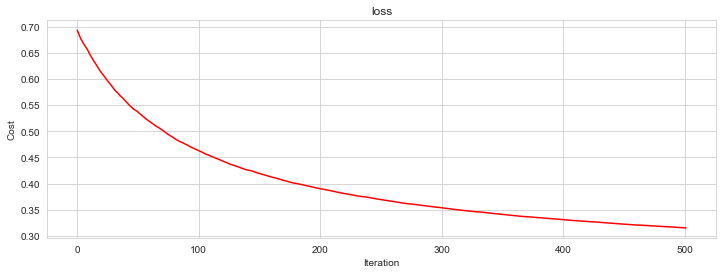

In [421]:
theta1 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=500, alpha=0.01)

In [422]:
print(theta1)

[[-0.33  0.02 -0.05  0.11  0.08  0.23  0.19  0.36  0.18  0.18  0.12  0.09
  -0.06  0.07  0.03  0.15  0.32  0.23  0.17  0.15  0.18  0.25  0.14  0.32
   0.2  -0.19 -0.15 -0.17 -0.06 -0.08 -0.11 -0.06 -0.03 -0.11 -0.03 -0.08
  -0.04 -0.1  -0.03 -0.09  0.   -0.07 -0.13 -0.08 -0.08 -0.15 -0.15 -0.04
  -0.09 -0.05 -0.06 -0.05  0.22  0.31  0.07  0.08  0.17  0.23]]


In [423]:
y_pred = predict(dealed_X_test, theta1)
# y_pred = ()
# print(y_pred)
# print(y_test)
accuracy_score(dealed_y_test, y_pred)
# classification_report(y_test, y_pred)

0.904

theta:[[-0.05  0.02 -0.01  0.04  0.01  0.05  0.05  0.07  0.04  0.05  0.03  0.04
  -0.    0.02  0.01  0.04  0.06  0.06  0.04  0.05  0.04  0.07  0.02  0.07
   0.04 -0.05 -0.04 -0.04 -0.03 -0.02 -0.03 -0.02 -0.02 -0.02 -0.01 -0.02
  -0.02 -0.03 -0.   -0.02 -0.   -0.02 -0.03 -0.02 -0.02 -0.03 -0.03 -0.01
  -0.02 -0.01 -0.02 -0.01  0.05  0.06  0.01  0.02  0.04  0.05]]
duration:0.33s


0.902

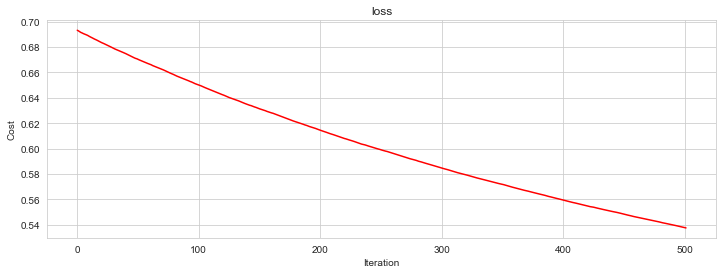

In [452]:
theta6 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=500, alpha=0.001)
y_pred = predict(dealed_X_test, theta6)
accuracy_score(dealed_y_test, y_pred)

theta:[[-3.80e+00 -4.28e-02 -3.00e-01  6.96e-02  1.37e+00  3.54e-01  3.41e-01
   1.19e+00  4.40e-01  1.50e-01  1.78e-01 -1.78e-01 -3.29e-01  4.22e-02
   3.58e-02  1.19e-01  7.13e-01  4.07e-01  1.99e-01  2.72e-01  5.99e-01
   3.23e-01  2.84e-01  1.18e+00  3.12e-01 -2.87e+00 -1.11e+00 -6.93e+00
   3.07e-01 -1.77e+00 -1.56e-01 -2.23e+00 -6.51e-01 -4.86e-01  2.73e-01
  -1.15e+00  3.20e-01  2.48e-01  1.70e-01 -5.41e-01 -1.61e-01 -2.97e+00
  -2.68e+00 -2.11e-01 -8.62e-01 -5.84e-01 -1.26e+00 -2.51e-03 -1.28e+00
  -4.71e-01 -2.09e-01 -2.37e-01  5.55e-01  1.41e+00  1.13e+00 -3.39e-01
   1.31e+00  3.93e-01]]
duration:3.45s


0.926

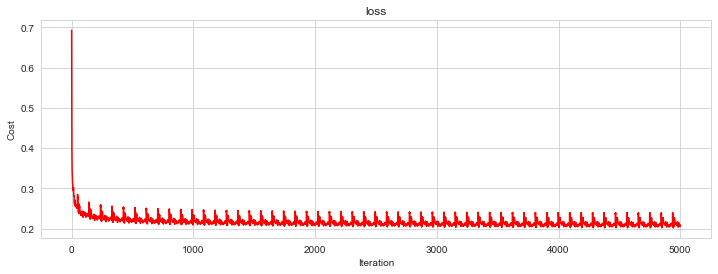

In [470]:
theta9 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=5000, alpha=1)
y_pred = predict(dealed_X_test, theta9)
accuracy_score(dealed_y_test, y_pred)

theta:[[-1.66 -0.05 -0.25  0.07  0.47  0.37  0.22  1.31  0.18  0.23  0.16 -0.08
  -0.14  0.01  0.02  0.25  0.71  0.45  0.1   0.09  0.46  0.23  0.52  1.32
   0.34 -1.99 -1.02 -1.82  0.26 -0.71 -0.28 -0.65 -0.23 -0.48  0.07 -0.81
   0.29  0.14  0.07 -0.48 -0.12 -0.76 -1.27 -0.13 -0.67 -0.67 -1.08 -0.08
  -0.74 -0.37 -0.23 -0.36  0.3   1.37  0.47 -0.2   0.88  0.39]]
duration:3.42s


0.915

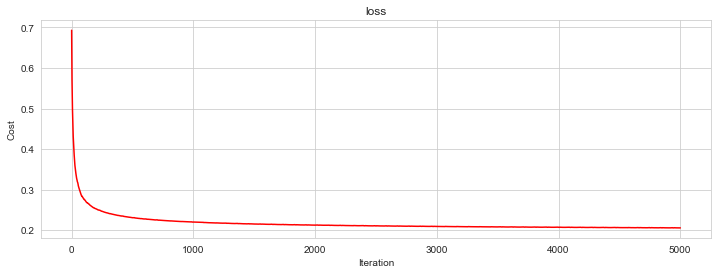

In [471]:
theta10 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=5000, alpha=0.1)
y_pred = predict(dealed_X_test, theta10)
accuracy_score(dealed_y_test, y_pred)

theta:[[-0.7  -0.05 -0.16  0.09  0.22  0.36  0.22  0.97  0.25  0.24  0.16 -0.02
  -0.14  0.03  0.02  0.26  0.69  0.41  0.18  0.11  0.36  0.26  0.35  0.83
   0.44 -0.71 -0.47 -0.52  0.07 -0.26 -0.28 -0.2  -0.08 -0.33 -0.04 -0.26
   0.09 -0.05 -0.05 -0.25 -0.08 -0.24 -0.45 -0.14 -0.27 -0.43 -0.5  -0.1
  -0.29 -0.22 -0.14 -0.18  0.37  0.86  0.19  0.13  0.4   0.39]]
duration:3.38s


0.912

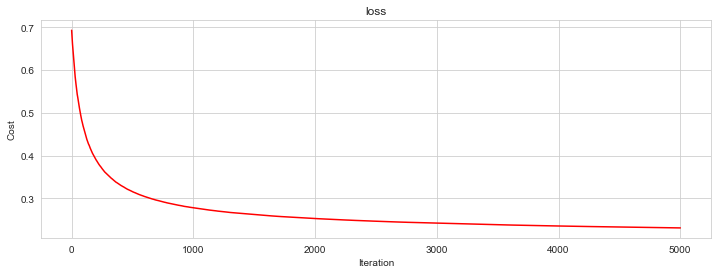

In [472]:
theta11 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=5000, alpha=0.01)
y_pred = predict(dealed_X_test, theta11)
accuracy_score(dealed_y_test, y_pred)

theta:[[-0.33  0.02 -0.05  0.11  0.08  0.22  0.19  0.36  0.18  0.18  0.12  0.09
  -0.05  0.07  0.03  0.15  0.32  0.24  0.17  0.15  0.18  0.24  0.14  0.32
   0.2  -0.19 -0.15 -0.17 -0.06 -0.08 -0.11 -0.06 -0.03 -0.11 -0.03 -0.08
  -0.04 -0.1  -0.03 -0.09  0.   -0.07 -0.13 -0.08 -0.08 -0.15 -0.15 -0.04
  -0.09 -0.05 -0.06 -0.05  0.21  0.31  0.07  0.08  0.17  0.23]]
duration:3.36s


0.904

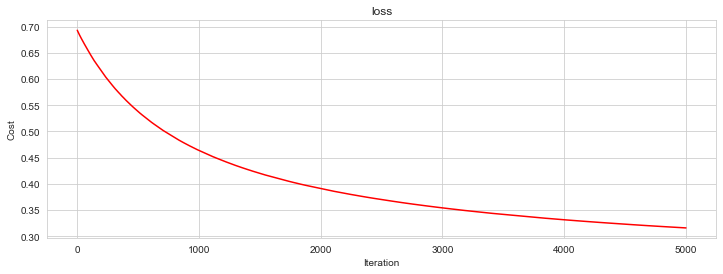

In [453]:
theta6 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=5000, alpha=0.001)
y_pred = predict(dealed_X_test, theta6)
accuracy_score(dealed_y_test, y_pred)

theta:[[-0.05  0.02 -0.01  0.04  0.01  0.05  0.05  0.07  0.04  0.05  0.03  0.04
  -0.    0.02  0.01  0.04  0.06  0.06  0.04  0.05  0.04  0.07  0.02  0.07
   0.04 -0.05 -0.04 -0.04 -0.03 -0.02 -0.03 -0.02 -0.02 -0.02 -0.02 -0.02
  -0.02 -0.03 -0.   -0.02 -0.   -0.02 -0.03 -0.02 -0.02 -0.03 -0.03 -0.01
  -0.02 -0.01 -0.02 -0.01  0.05  0.06  0.01  0.02  0.04  0.05]]
duration:3.25s


0.9

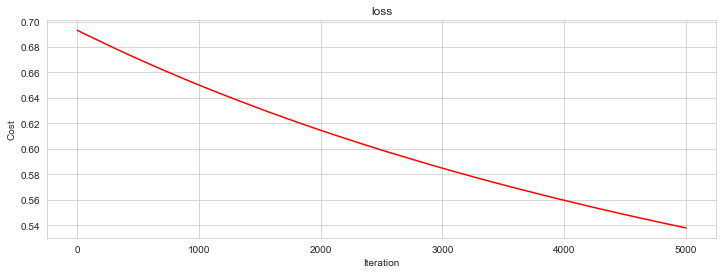

In [473]:
theta12 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=5000, alpha=0.0001)
y_pred = predict(dealed_X_test, theta12)
accuracy_score(dealed_y_test, y_pred)

theta:[[-0.7  -0.05 -0.16  0.09  0.22  0.36  0.22  0.97  0.25  0.24  0.16 -0.02
  -0.14  0.03  0.02  0.26  0.69  0.41  0.18  0.11  0.36  0.26  0.35  0.83
   0.44 -0.71 -0.47 -0.52  0.07 -0.26 -0.28 -0.2  -0.08 -0.33 -0.04 -0.26
   0.09 -0.05 -0.05 -0.25 -0.08 -0.24 -0.45 -0.14 -0.27 -0.43 -0.5  -0.1
  -0.29 -0.22 -0.14 -0.18  0.37  0.86  0.19  0.13  0.4   0.39]]
duration:3.37s


0.912

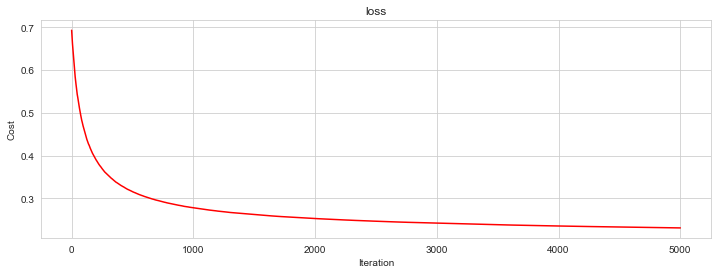

In [424]:
theta2 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=5000, alpha=0.01)
y_pred = predict(dealed_X_test, theta2)
accuracy_score(dealed_y_test, y_pred)

theta:[[-1.67 -0.05 -0.25  0.08  0.46  0.36  0.2   1.32  0.2   0.24  0.15 -0.08
  -0.13  0.    0.01  0.26  0.72  0.45  0.11  0.08  0.46  0.24  0.52  1.32
   0.35 -1.99 -1.01 -1.8   0.26 -0.71 -0.3  -0.65 -0.22 -0.48  0.05 -0.81
   0.29  0.14  0.07 -0.48 -0.12 -0.75 -1.26 -0.13 -0.68 -0.67 -1.09 -0.08
  -0.73 -0.36 -0.24 -0.37  0.27  1.37  0.46 -0.2   0.86  0.4 ]]
duration:34.54s


0.915

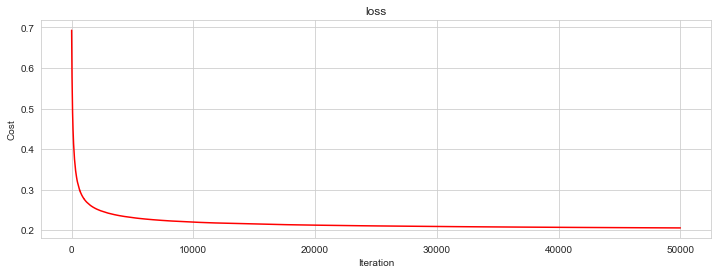

In [468]:
theta8 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=50000, alpha=0.01)
y_pred = predict(dealed_X_test, theta8)
accuracy_score(dealed_y_test, y_pred)

theta:[[-1.66 -0.05 -0.25  0.07  0.47  0.37  0.22  1.31  0.18  0.23  0.16 -0.08
  -0.14  0.01  0.02  0.25  0.71  0.45  0.1   0.09  0.46  0.23  0.52  1.32
   0.34 -1.99 -1.02 -1.82  0.26 -0.71 -0.28 -0.65 -0.23 -0.48  0.07 -0.81
   0.29  0.14  0.07 -0.48 -0.12 -0.76 -1.27 -0.13 -0.67 -0.67 -1.08 -0.08
  -0.74 -0.37 -0.23 -0.36  0.3   1.37  0.47 -0.2   0.88  0.39]]
duration:3.51s


0.915

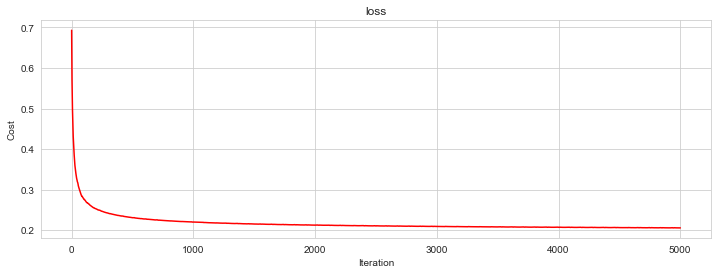

In [427]:
theta3 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=5000, alpha=0.1)
y_pred = predict(dealed_X_test, theta3)
accuracy_score(dealed_y_test, y_pred)

theta:[[-2.19e+00 -6.59e-02 -2.62e-01  6.02e-02  6.16e-01  3.82e-01  2.22e-01
   1.28e+00  1.81e-01  2.33e-01  1.58e-01 -7.85e-02 -1.48e-01  4.19e-03
  -1.57e-03  2.43e-01  7.09e-01  4.57e-01  1.06e-01  9.34e-02  4.65e-01
   2.60e-01  4.75e-01  1.28e+00  3.25e-01 -2.38e+00 -1.09e+00 -2.74e+00
   2.80e-01 -9.26e-01 -2.56e-01 -9.34e-01 -3.43e-01 -4.51e-01  1.19e-01
  -1.03e+00  3.04e-01  1.71e-01  8.02e-02 -5.25e-01 -1.20e-01 -1.13e+00
  -1.61e+00 -1.30e-01 -7.88e-01 -6.70e-01 -1.20e+00 -7.09e-02 -9.22e-01
  -3.65e-01 -2.37e-01 -3.62e-01  3.18e-01  1.38e+00  6.15e-01 -3.08e-01
   1.12e+00  3.94e-01]]
duration:7.36s


0.92

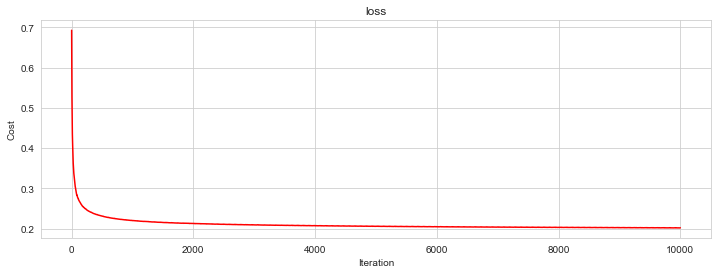

In [430]:
theta4 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=10000, alpha=0.1)
y_pred = predict(dealed_X_test, theta4)
accuracy_score(dealed_y_test, y_pred)

theta:[[-3.87 -0.09 -0.27  0.09  1.34  0.36  0.23  1.24  0.2   0.22  0.15 -0.1
  -0.12  0.02  0.03  0.28  0.72  0.49  0.09  0.06  0.56  0.24  0.37  1.12
   0.27 -2.78 -1.11 -6.47  0.31 -1.59 -0.24 -2.07 -0.73 -0.42  0.24 -1.13
   0.35  0.15  0.09 -0.56 -0.13 -2.89 -2.61 -0.13 -0.87 -0.66 -1.26 -0.05
  -1.23 -0.33 -0.23 -0.29  0.2   1.37  0.96 -0.4   1.3   0.48]]
duration:33.93s


0.921

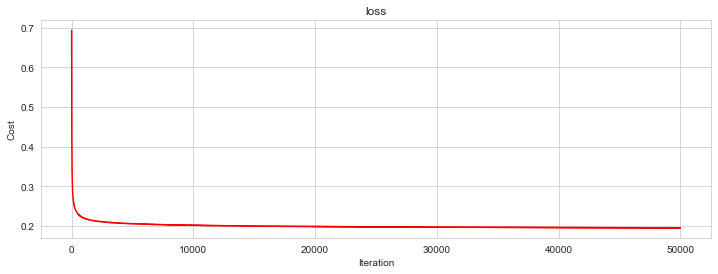

In [431]:
theta5 = runExpe(dealed_X_train, dealed_y_train, theta, 32, STOP_ITER, thresh=50000, alpha=0.1)
y_pred = predict(dealed_X_test, theta5)
accuracy_score(dealed_y_test, y_pred)

#### 混淆矩阵

In [385]:
def plot_confusion_matrix(cm, classes, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # this fuction is used tp print the confusion matrix
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                 horizontalalignment='center', 
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predict label')

recall metric in the test data:  0.8654822335025381
accuracy in the test data:  0.921


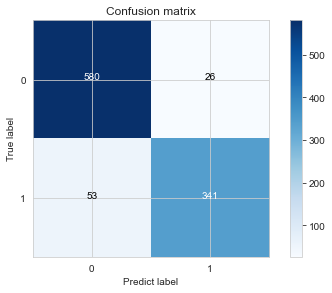

In [437]:
import itertools
from sklearn.metrics import confusion_matrix

y_pred = predict(dealed_X_test, theta5)

cnf_matrix = confusion_matrix(dealed_y_test, y_pred)
np.set_printoptions(precision = 2)

print("recall metric in the test data: ", cnf_matrix[1, 1]/(cnf_matrix[1, 0] + cnf_matrix[1, 1]))
print("accuracy in the test data: ", (cnf_matrix[1, 1] + cnf_matrix[0, 0]) / (cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1]+cnf_matrix[0,0]))
# plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix,
                     classes=class_names,
                     title = 'Confusion matrix')
plt.show()